In [87]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [89]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
x = df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [91]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [92]:
scaler = StandardScaler()

In [93]:
scaler_x = scaler.fit_transform(x)

In [94]:
scaled_x = pd.DataFrame(scaler_x, columns=x.columns)
scaled_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


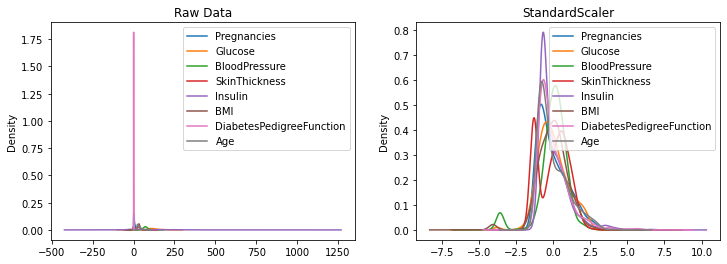

In [95]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# fig, ax = plt.subplots(1행, 2열) : 하나의 ax 만을 가지는 하나의 figure 생성
x.plot(kind='kde', title='Raw Data', ax=ax[0])
# kde = 밀도 그래프
scaled_x.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [96]:
# 학습셋과 테스트셋을 75:25 비율로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.25, random_state=0)

In [97]:
x_train.shape #구조를 항상 확인해야 함

(576, 8)

In [98]:
x_test.shape

(192, 8)

# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier #결정트리 분류기를 불러옵니다.

In [114]:
Classifier = DecisionTreeClassifier()

In [115]:
Classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [116]:
y_pred = Classifier.predict(x_test)

In [118]:
# accuracy = sum(y_test == y_pred)/192

0.9322916666666666

In [47]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
# 10개의 파일로 쪼개서 테스트하는 10겹 교차검증

In [52]:
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

In [54]:
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100)) #표준편차

Accuracy : 67.89%
Standard Deviation : 7.32%


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators = 100)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 75.52%
Standard Deviation : 5.76%


In [61]:
Classifier = RandomForestClassifier(n_estimators = 200)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 75.70%
Standard Deviation : 3.11%


# 가우시안 나이브 베이즈

In [67]:
from sklearn.naive_bayes import GaussianNB

Classifier = GaussianNB()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

In [65]:
# 랜덤포레스트와 가우시안나이브베이즈는 같은 성격을 띔. 정확도가 거의 비슷함. 

# K-NN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

Classifier = KNeighborsClassifier()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 70.51%
Standard Deviation : 3.81%


In [68]:
# 위에 두개보다는 정확도가 떨어짐. 

# AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

Classifier = AdaBoostClassifier()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 73.08%
Standard Deviation : 5.04%


# 이차 판별 분석

In [71]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Classifier = QuadraticDiscriminantAnalysis()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 72.56%
Standard Deviation : 5.21%


# SVM

In [72]:
from sklearn.svm import SVC

Classifier = SVC(kernel='linear')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 76.02%
Standard Deviation : 6.21%


In [73]:
# 지금까지 중엔 제일 정확도가 높음

# SVM - RBF

In [74]:
from sklearn.svm import SVC
Classifier = SVC(kernel='rbf')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 75.00%
Standard Deviation : 3.21%


# votting

In [76]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')


Classifier = VotingClassifier(estimators=[('lr', clf1),('rf', clf2),('gnb', clf3)])
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 74.66%
Standard Deviation : 6.12%


# Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier
Classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X=x_train, y=y_train, cv=skf)

print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 74.49%
Standard Deviation : 3.41%


# 여러 알고리즘 성능을 한 번에 구분하기

Mean accuracy of D_tree : 68.74 %
Mean accuracy of RF : 75.53 %
Mean accuracy of GNB : 74.30 %
Mean accuracy of KNN : 69.28 %
Mean accuracy of Ada : 75.00 %
Mean accuracy of QDA : 74.82 %
Mean accuracy of SVM_l : 74.28 %
Mean accuracy of SVM_k : 72.60 %
Mean accuracy of Voting : 74.78 %
Mean accuracy of Bagging : 76.04 %


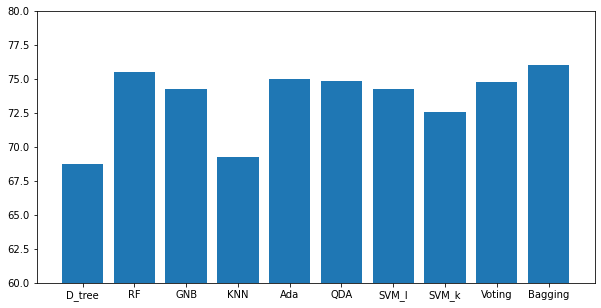

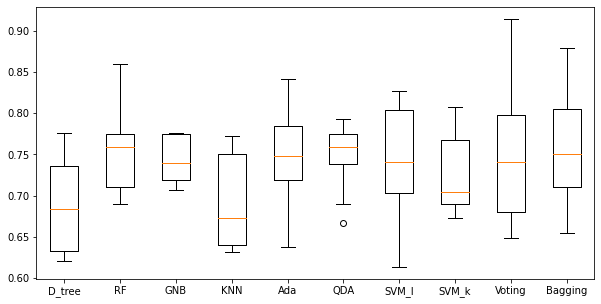

In [79]:
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = x_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()